In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("date-hour-soo-dest-2016.csv")

In [3]:
df2=pd.read_csv("date-hour-soo-dest-2017.csv")

In [4]:
df=df1.append(df2) #birlştirdik 2016 ve 2017 deki verileri

In [5]:
df

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2016-01-01,0.0,12TH,12TH,1.0
1,2016-01-01,0.0,12TH,16TH,1.0
2,2016-01-01,0.0,12TH,24TH,4.0
3,2016-01-01,0.0,12TH,ASHB,4.0
4,2016-01-01,0.0,12TH,BALB,2.0
...,...,...,...,...,...
282696,2017-01-12,6.0,WDUB,DBRK,3.0
282697,2017-01-12,6.0,WDUB,DELN,1.0
282698,2017-01-12,6.0,WDUB,DUBL,1.0
282699,2017-01-12,6.0,WDUB,EMBR,68.0


In [6]:
df = df.drop(index=df.index[-1])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605655 entries, 0 to 282699
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 605655 non-null  object 
 1   Hour                 605654 non-null  float64
 2   Origin Station       605654 non-null  object 
 3   Destination Station  605654 non-null  object 
 4   Trip Count           605654 non-null  float64
dtypes: float64(2), object(3)
memory usage: 27.7+ MB


In [8]:
df.isnull().sum()

Date                   0
Hour                   1
Origin Station         1
Destination Station    1
Trip Count             1
dtype: int64

In [9]:
#date verisini ay yıl gün diye ayırıyoruz
df["Date"]=pd.to_datetime(df['Date'])
df["Day"]=df["Date"].dt.dayofweek
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year
df['WeekDay']=df['Date'].dt.day_name()
df['Month_Name']=df['Date'].dt.month_name()
df.drop("Date",axis=1,inplace=True)

In [10]:
df

,Hour,Origin Station,Destination Station,Trip Count,Day,Month,Year,WeekDay,Month_Name
0,0.0,12TH,12TH,1.0,4,1,2016,Friday,January
1,0.0,12TH,16TH,1.0,4,1,2016,Friday,January
2,0.0,12TH,24TH,4.0,4,1,2016,Friday,January
3,0.0,12TH,ASHB,4.0,4,1,2016,Friday,January
4,0.0,12TH,BALB,2.0,4,1,2016,Friday,January
...,...,...,...,...,...,...,...,...,...
282695,6.0,WDUB,DALY,1.0,3,1,2017,Thursday,January
282696,6.0,WDUB,DBRK,3.0,3,1,2017,Thursday,January
282697,6.0,WDUB,DELN,1.0,3,1,2017,Thursday,January
282698,6.0,WDUB,DUBL,1.0,3,1,2017,Thursday,January


1.Which BART station is the busiest?

In [11]:
df['total_ridership'] =df['Origin Station'] + df['Destination Station']

In [12]:
total_trip = df.groupby(["total_ridership"])["Trip Count"].sum()

In [13]:
# En yoğun istasyonun bulunması
busiest_station = total_trip.idxmax() #idmax()en büyük değere sahip olan dizini (indeksi) döndürür
busiest_station_trip = total_trip.max()

In [14]:
print(busiest_station)
print(busiest_station_trip)

POWLBALB
47146.0


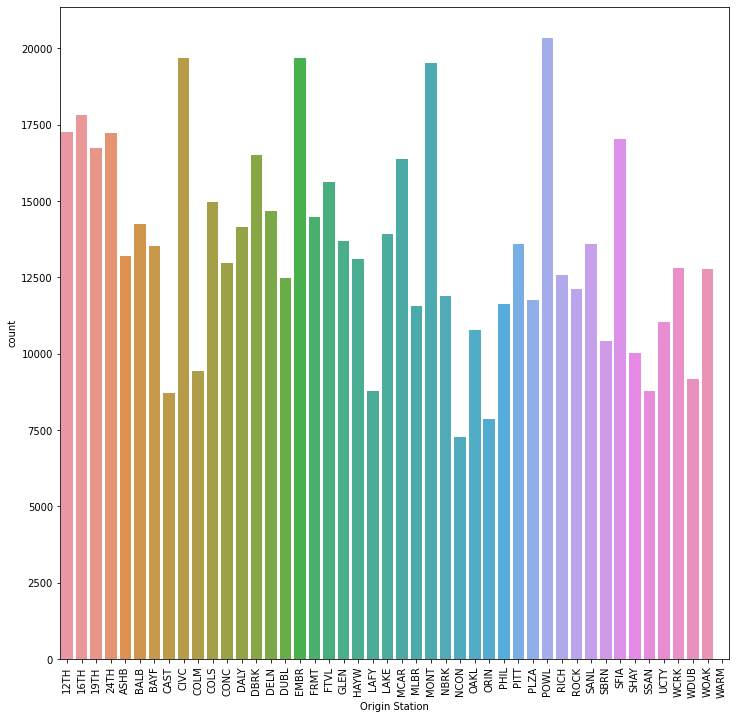

In [15]:
fig=plt.figure(figsize=(12,12))
ax=sns.countplot(df['Origin Station'])
ax.set_xlabel('Origin Station')
plt.xticks(rotation=90);

2.What is the least popular BART route?

In [16]:
# En az popüler rota ve yolcu sayısı
least_popular_route = total_trip.idxmin()
least_popular_route_ridership = total_trip.min()

In [17]:
print(least_popular_route)
print(least_popular_route_ridership)

CASTWARM
1.0


3.When is the best time to go to SF from Berkeley if you want to find a seat?

In [23]:
total_trip

total_ridership
12TH12TH     973.0
12TH16TH    5512.0
12TH19TH    1172.0
12TH24TH    5128.0
12THASHB    4538.0
             ...  
WOAKSSAN     214.0
WOAKUCTY     233.0
WOAKWCRK     322.0
WOAKWDUB     198.0
WOAKWOAK     801.0
Name: Trip Count, Length: 2027, dtype: float64

In [24]:
df['Origin Station'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK', nan, 'WARM'], dtype=object)

In [25]:
df['Destination Station'].unique()

array(['12TH', '16TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CIVC', 'CONC',
       'DBRK', 'DELN', 'DUBL', 'EMBR', 'FTVL', 'LAFY', 'LAKE', 'MCAR',
       'MONT', 'NBRK', 'ORIN', 'PHIL', 'PITT', 'PLZA', 'POWL', 'ROCK',
       'SANL', 'SBRN', 'SHAY', 'WCRK', 'WOAK', '19TH', 'COLM', 'COLS',
       'DALY', 'GLEN', 'MLBR', 'NCON', 'RICH', 'SSAN', 'UCTY', 'WDUB',
       'CAST', 'HAYW', 'SFIA', 'FRMT', 'OAKL', nan, 'WARM'], dtype=object)

In [26]:
berkeley_to_sf=df[(df['Origin Station']=='DBRK') & (df['Destination Station']=='SSAN')]

In [29]:
berkeley_to_sf.groupby('Day').count()['Trip Count'].sort_values(ascending=False)

Day
1    35
2    34
0    32
4    28
3    22
6    17
5    14
Name: Trip Count, dtype: int64

In [31]:
berkeley_to_sf.groupby('Hour').count()['Trip Count'].sort_values(ascending=False)

Hour
22.0    18
18.0    17
16.0    16
17.0    15
20.0    13
19.0    11
8.0     10
9.0     10
14.0    10
23.0     9
15.0     8
21.0     8
13.0     8
11.0     8
10.0     5
7.0      5
0.0      4
12.0     3
1.0      2
3.0      1
2.0      1
Name: Trip Count, dtype: int64

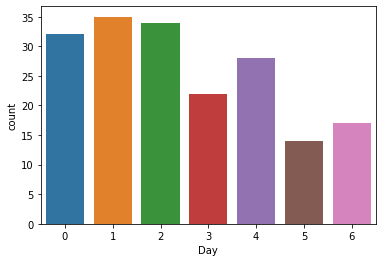

In [33]:
sns.countplot(berkeley_to_sf['Day'])

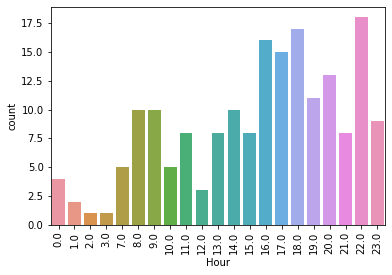

In [34]:
sns.countplot(berkeley_to_sf['Hour'])
plt.xticks(rotation=90);

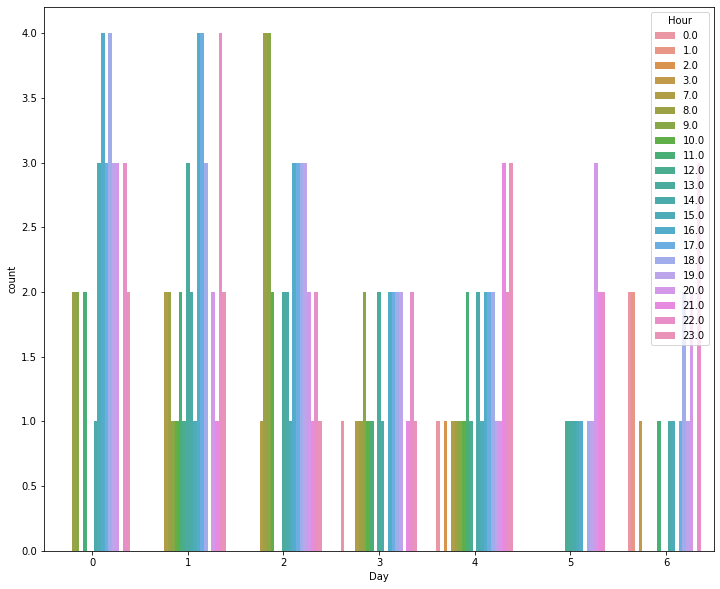

In [37]:
plt.figure(figsize=(12,10))
sns.countplot(berkeley_to_sf['Day'],hue=berkeley_to_sf['Hour'])

4.Which day of the week is the busiest?

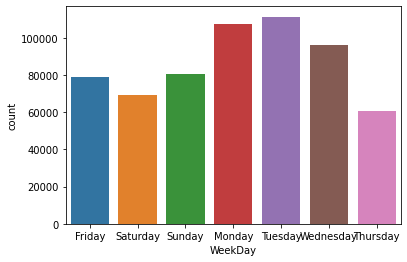

In [38]:
sns.countplot(df['WeekDay'])

In [39]:
daily_ridership = df.groupby(["WeekDay"])["Trip Count"].sum()

In [40]:
busiest_day = daily_ridership.idxmax()

In [41]:
busiest_day

'Tuesday'

5.How many people take the BART late at night?

In [42]:
df[(df['Hour']>0) & (df['Hour']<6)]['Trip Count'].sum()

166024.0

##Question A: Compute the straight line distance between every station

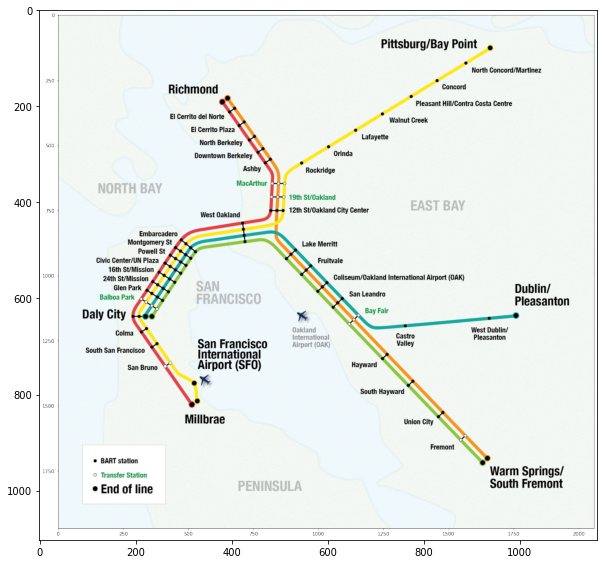

In [46]:
img=plt.imread('BART_app_map,_September_2017.png')
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [49]:
stationcoord=pd.read_csv("coord.csv")

In [50]:
stationsA=stationcoord[["station_name","latitute","longitude"]]
stationsB=stationcoord[["station_name","latitute","longitude"]]

In [51]:
stationcoord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   station_name  50 non-null     object
 1   latitute      50 non-null     int64 
 2   longitude     50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


In [52]:
stationsA[["longitude","latitude"]]=stationsA[["longitude","latitute"]].astype("float")
stationsB[["longitude","latitude"]]=stationsB[["longitude","latitute"]].astype("float")

In [53]:
stationsA[['lat_radians_A','long_radians_A']] = np.radians(stationsA[['latitute','longitude']])
stationsB[['lat_radians_B','long_radians_B']] = np.radians(stationsB[['latitute','longitude']])

In [54]:
import sklearn
from sklearn import neighbors

dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')

dist_matrix = (dist.pairwise
    (stationsA[['lat_radians_A','long_radians_A']],stationsB[['lat_radians_B','long_radians_B']])*6371)

# Note that 6371 is the radius of the earth in kilometers

df_dist_matrix = (
    pd.DataFrame(dist_matrix,index=stationsA['station_name'], 
                 columns=stationsB['station_name'])
)

In [55]:
df_dist_matrix

station_name,12TH,19TH,MCAR,16TH,CIVC,POWL,MONT,EMBR,24TH,GLEN,...,CAST,WDUB,DUBL,OAKL,ASHB,DBRK,NBRK,PLZA,DELN,RICH
station_name,,,,,,,,,,,,,,,,,,,,,
12TH,0.000000,1057.584186,1663.472619,8909.621742,7038.016162,4778.944596,2618.937892,995.741980,9860.127863,11288.385173,...,11155.957608,2007.513335,15108.539289,9561.014410,6299.982047,9502.164627,11941.896665,14561.366701,17145.809090,18813.276291
19TH,1057.584186,0.000000,988.388694,7853.930801,6222.015617,4397.981758,2604.512517,556.256659,9041.822315,11020.484362,...,10099.364087,3064.862879,14262.358698,9105.276044,5725.558167,9617.961499,12765.303827,15591.577920,17527.017874,19124.229234
MCAR,1663.472619,988.388694,0.000000,7500.666094,5377.898240,3411.359073,1804.217720,671.289604,9399.526513,11830.365496,...,9738.349267,3488.740903,13450.385679,8122.545384,4757.701582,8728.025766,12380.238332,16060.129375,18498.869833,18137.509047
16TH,8909.621742,7853.930801,7500.666094,0.000000,4070.661742,6995.140922,8330.694084,8034.467182,4789.736736,9108.528448,...,2248.334567,10910.124618,7174.099956,6723.996970,5804.863217,10202.138170,15499.036586,16455.643072,12594.587316,11871.977078
CIVC,7038.016162,6222.015617,5377.898240,4070.661742,0.000000,3211.595762,5209.542583,6049.156203,8644.261551,12953.308665,...,5611.405294,8639.787371,8072.502140,3761.319771,1747.244659,6627.616593,12259.494088,17171.622255,15572.994901,13046.697363
POWL,4778.944596,4397.981758,3411.359073,6995.140922,3211.595762,0.000000,2315.445231,3969.100529,10882.686156,14590.029670,...,8792.583940,5846.250524,10599.252254,4782.086203,1724.137912,5630.111294,10559.130518,15885.536470,18083.951955,14726.603225
MONT,2618.937892,2604.512517,1804.217720,8330.694084,5209.542583,2315.445231,0.000000,2061.933911,11044.614919,13612.756136,...,10435.993892,3542.331535,12914.520466,7028.454891,4002.477343,7019.247480,10690.304653,15154.261603,19103.666296,16580.785987
EMBR,995.741980,556.256659,671.289604,8034.467182,6049.156203,3969.100529,2061.933911,0.000000,9530.359554,11573.471456,...,10281.569562,2893.110991,14121.654967,8725.609148,5392.157699,9080.901564,12273.015743,15491.832435,17976.093504,18634.440654
24TH,9860.127863,9041.822315,9399.526513,4789.736736,8644.261551,10882.686156,11044.614919,9530.359554,0.000000,4340.251902,...,4783.111256,11442.790428,9242.548334,11458.136530,10243.393504,14978.347170,18222.364927,13261.835489,9737.965574,11347.660988


In [56]:
df_dist_long = (pd.melt(df_dist_matrix.reset_index(),id_vars='station_name'))
df_dist_long = df_dist_long.rename(columns={'value':'km'})

In [57]:
df_dist_long

,station_name,station_name,km
0,12TH,12TH,0.000000
1,12TH,12TH,1057.584186
2,12TH,12TH,1663.472619
3,12TH,12TH,8909.621742
4,12TH,12TH,7038.016162
...,...,...,...
2495,RICH,RICH,9563.987153
2496,RICH,RICH,6884.979341
2497,RICH,RICH,4899.651141
2498,RICH,RICH,3377.728342


##Question B: Build a model that can predicted the number of people commuting to work by

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605655 entries, 0 to 282699
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Hour                 605654 non-null  float64
 1   Origin Station       605654 non-null  object 
 2   Destination Station  605654 non-null  object 
 3   Trip Count           605654 non-null  float64
 4   Day                  605655 non-null  int64  
 5   Month                605655 non-null  int64  
 6   Year                 605655 non-null  int64  
 7   WeekDay              605655 non-null  object 
 8   Month_Name           605655 non-null  object 
 9   total_ridership      605654 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 67.0+ MB


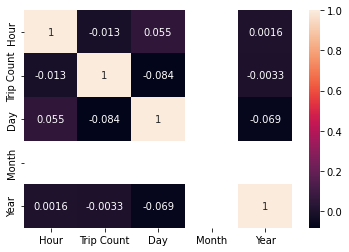

In [70]:
sns.heatmap(df.corr(),annot=True);

In [73]:
df.drop(["Origin Station","Destination Station","WeekDay","Month_Name","total_ridership"],axis=1, inplace=True)

In [74]:
df.tail()

,Hour,Trip Count,Day,Month,Year
282695,6.0,1.0,3,1,2017
282696,6.0,3.0,3,1,2017
282697,6.0,1.0,3,1,2017
282698,6.0,1.0,3,1,2017
282699,6.0,68.0,3,1,2017


In [80]:
df.isnull().sum()

Hour          1
Trip Count    1
Day           0
Month         0
Year          0
dtype: int64

In [82]:
nullcol=["Trip Count","Hour"]
for i in nullcol:
  df[i]=df[i].fillna(df[i].mean())

In [83]:
x=df.drop("Trip Count",axis=1)

In [84]:
y=df[["Trip Count"]]

In [85]:
def regress(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    
    algos=[L,R,Lass,E]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
          
    return result.sort_values('R_Squared',ascending=False)

In [86]:
regress(x,y)

,R_Squared,RMSE,MAE
LinearRegression,0.007425,32.836475,13.155855
Ridge,0.007425,32.836475,13.155855
ElasticNet,0.006982,32.843805,13.149866
Lasso,0.006972,32.843971,13.148821
